In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The Various Methods with Their Solution

In [2]:
# Spring function
def spring(t,curr):
    x, v = curr
    return v, -k/m*x

# Initial Conditions
k=0.1
m=5
x0 = 5
v0 = 0
w=(k/m)**0.5
A=5
dt = 0.1
time = np.arange(0,100,dt)

# Solution
x=A*np.cos(w*time)
v=-A*w*np.sin(w*time)

In [3]:
# Solution using integrator
initv = [x0,v0]
sol1 = solve_ivp(spring, [0, 100], initv, method='RK45')
sol2 = solve_ivp(spring, [0, 100], initv, method='RK23')
sol3 = solve_ivp(spring, [0, 100], initv, method='Radau')
sol4 = solve_ivp(spring, [0, 100], initv, method='BDF')
sol5 = solve_ivp(spring, [0, 100], initv, method='LSODA')

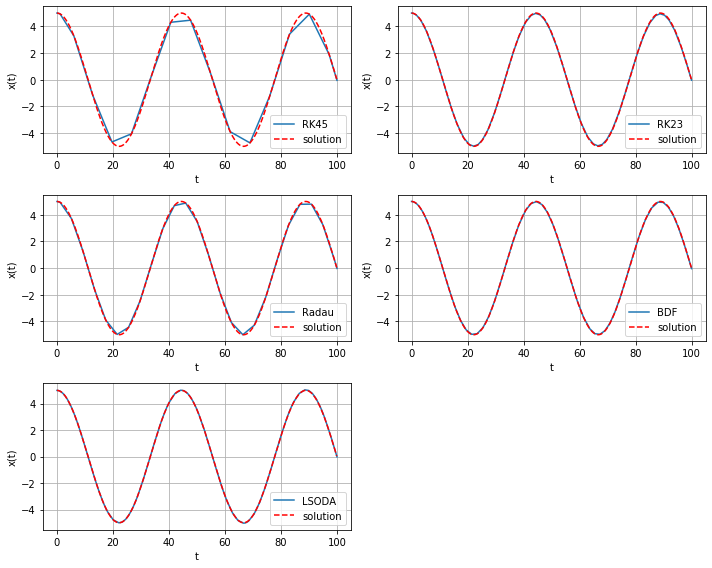

In [4]:
f = plt.figure(figsize=(10,8))
f.add_subplot(3,2,1)
plt.plot(sol1.t,sol1.y[0], label='RK45')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,2)
plt.plot(sol2.t,sol2.y[0], label='RK23')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,3)
plt.plot(sol3.t,sol3.y[0], label='Radau')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,4)
plt.plot(sol4.t,sol4.y[0], label='BDF')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,5)
plt.plot(sol5.t,sol5.y[0], label='LSODA')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()

plt.tight_layout()

 We can see from here, the adaptive may not look smooth but they still get the job done by having each points connecting still on the solution path.

# N-Particle Spring Problem

With spring equation of force as : $ F = -k(x-x_0) $
Hamiltonia equation as so: $ H = T + V $

$$ H = \sum_n {1 \over{2}}mx_n'^2 + \sum_n {k\over2}[(x_n - x_{n-1})^2 + (x_{n+1} - x_{n})^2] $$

We get the force acting on each particle as: $ x_n'' = F (x_n -x_{n-1}) - F (x_{n+1} - x_n) $

From there, we get the equation of motion with Euler-Cromer as follows:
$$ v_n(t+1) = v_n(t) + x_n''(t)dt $$

$$ x_n(t+1) = x_n(t) + v_n(t+1)dt $$

Procedure:
- Put each particle at position of $n$ such that $n=1,2,3, ... , N$
- Let particle at $n=0$ and $n=N+1$ and they will stay constant always resembling a wall
- Set an initial condition on particle $1$ and start the simulation

In [5]:
def spring(x, x0=0):
    return -k/m*(x-x0)

In [6]:
def springE(x, x0=0):
    return k/2*(x-x0)**2

## 1-particle Spring

In [7]:
# Spring constants
k=1
m=1

# Function parameters
N=1           # Number of particles
l=12
t0=0           # Initial time
T=50           # Final time
steps=10000            # Iterations to do Euler-Cromer
dt=(T-t0)/steps    # dt
time = np.linspace(t0,T,steps)

# Initial conditions
x0 = 1
v0 = 0

In [8]:
x0l = []
v0l = []
x = []
v = []
for i in range(N+2):
    x0l.append(i)
    v0l.append(0)
    x.append(np.array([float(i)]))
    v.append(np.array([float(0)]))

x[1][-1] += x0
v[1][-1] += v0

for t in time:
    for n in range(1,N+1):
        dvdt = spring( (x[n][-1]-x0l[n]), (x[n-1][-1]-x0l[n-1]) ) - spring( (x[n+1][-1]-x0l[n+1]), (x[n][-1]-x0l[n]) )
        vnew = v[n][-1] + dvdt*dt
        xnew = x[n][-1] + vnew*dt
        
        x[n] = np.append(x[n], xnew)
        v[n] = np.append(v[n], vnew)

### Phase Diagram

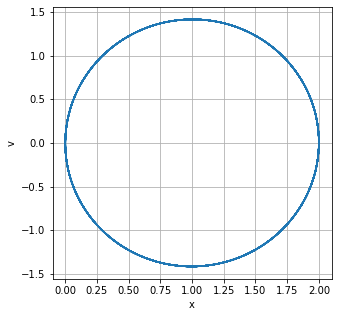

In [9]:
plt.figure(figsize=(5,5))
for n in range(1,N+1):
    plt.plot(x[n], v[n])
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

### Motion Diagram

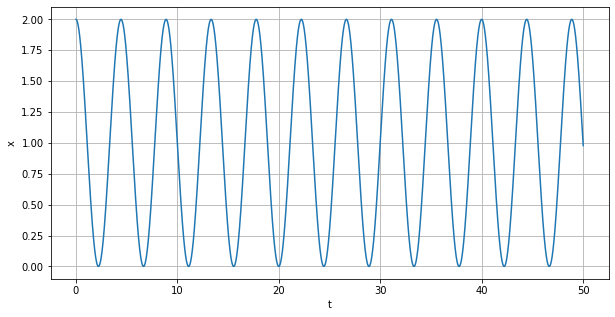

In [10]:
plt.figure(figsize=(10,5))
for n in range(1,N+1):
    plt.plot(time, x[n][:-1])
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

### Energy Diagram

In [11]:
E = []
for n in range(1,N+1):
    T = 1/2*m*v[n]**2
    V = springE( (np.array(x[n+1])-x0l[n+1]), (np.array(x[n])-x0l[n]) ) + springE( (np.array(x[n])-x0l[n]), (np.array(x[n-1]-x0l[n-1])) )
    E.append(T+V)
Etot=sum(E)

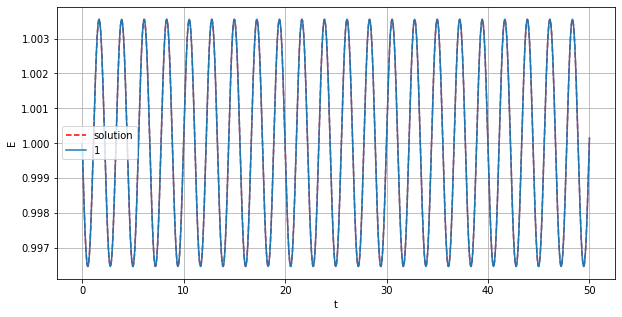

In [12]:
plt.figure(figsize=(10,5))
plt.plot(time, Etot[:-1], 'r--', label='solution')
for n in range(N):
    plt.plot(time, E[n][:-1], label=str(n+1))
plt.xlabel('t')
plt.ylabel('E')
plt.grid()
plt.legend()

## N-Particle Spring (5)

In [13]:
# Spring constants
k=1
m=1

# Function parameters
N=5           # Number of particles
l=12
t0=0           # Initial time
T=50           # Final time
steps=10000            # Iterations to do Euler-Cromer
dt=(T-t0)/steps    # dt
time = np.linspace(t0,T,steps)

# Initial conditions
x0 = 1
v0 = 0

In [14]:
x0l = []
v0l = []
x = []
v = []
for i in range(N+2):
    x0l.append(i)
    v0l.append(0)
    x.append(np.array([float(i)]))
    v.append(np.array([float(0)]))

x[1][-1] += x0
v[1][-1] += v0

for t in time:
    for n in range(1,N+1):
        dvdt = spring( (x[n][-1]-x0l[n]), (x[n-1][-1]-x0l[n-1]) ) - spring( (x[n+1][-1]-x0l[n+1]), (x[n][-1]-x0l[n]) )
        vnew = v[n][-1] + dvdt*dt
        xnew = x[n][-1] + vnew*dt
        
        x[n] = np.append(x[n], xnew)
        v[n] = np.append(v[n], vnew)

### Phase Diagram

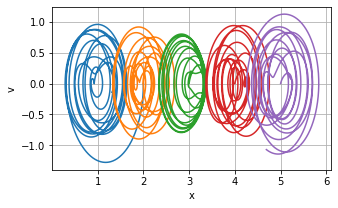

In [15]:
plt.figure(figsize=(5,3))
for n in range(1,N+1):
    plt.plot(x[n], v[n])
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

### Motion Diagram

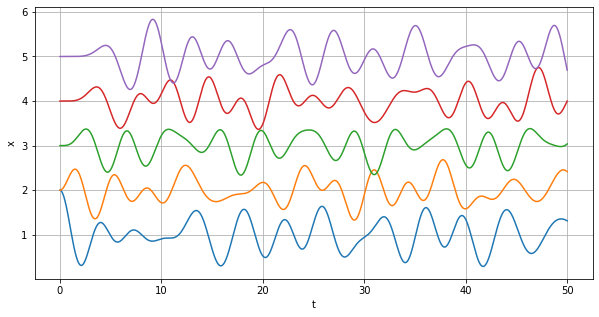

In [16]:
plt.figure(figsize=(10,5))
for n in range(1,N+1):
    plt.plot(time, x[n][:-1])
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

### Energy Diagram

In [17]:
E = []
for n in range(1,N+1):
    T = 1/2*m*v[n]**2
    V = springE( (np.array(x[n+1])-x0l[n+1]), (np.array(x[n])-x0l[n]) ) + springE( (np.array(x[n])-x0l[n]), (np.array(x[n-1]-x0l[n-1])) )
    E.append(T+V)
Etot=sum(E)

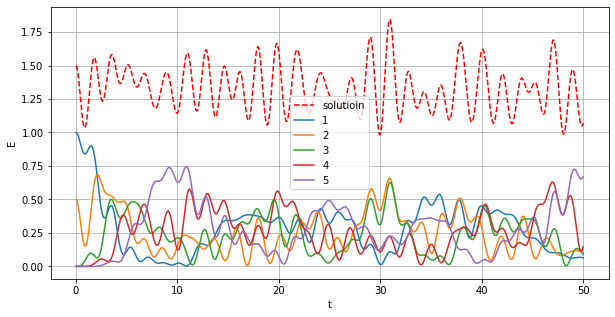

In [18]:
plt.figure(figsize=(10,5))
plt.plot(time, Etot[:-1], 'r--', label='solutioin')
for n in range(N):
    plt.plot(time, E[n][:-1], label=str(n+1))
plt.xlabel('t')
plt.ylabel('E')
plt.grid()
plt.legend()

## N-Particle Spring (20)

In [19]:
# Spring constants
k=1
m=1

# Function parameters
N=20           # Number of particles
l=12
t0=0           # Initial time
T=50           # Final time
steps=10000            # Iterations to do Euler-Cromer
dt=(T-t0)/steps    # dt
time = np.linspace(t0,T,steps)

# Initial conditions
x0 = 1
v0 = 0

In [20]:
x0l = []
v0l = []
x = []
v = []
for i in range(N+2):
    x0l.append(i)
    v0l.append(0)
    x.append(np.array([float(i)]))
    v.append(np.array([float(0)]))

x[1][-1] += x0
v[1][-1] += v0

for t in time:
    for n in range(1,N+1):
        dvdt = spring( (x[n][-1]-x0l[n]), (x[n-1][-1]-x0l[n-1]) ) - spring( (x[n+1][-1]-x0l[n+1]), (x[n][-1]-x0l[n]) )
        vnew = v[n][-1] + dvdt*dt
        xnew = x[n][-1] + vnew*dt
        
        x[n] = np.append(x[n], xnew)
        v[n] = np.append(v[n], vnew)

### Phase Diagram

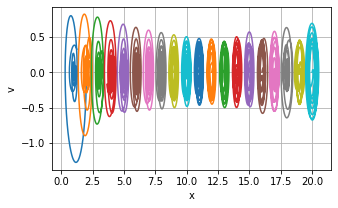

In [26]:
plt.figure(figsize=(5,3))
for n in range(1,N+1):
    plt.plot(x[n], v[n])
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

### Motion Diagram

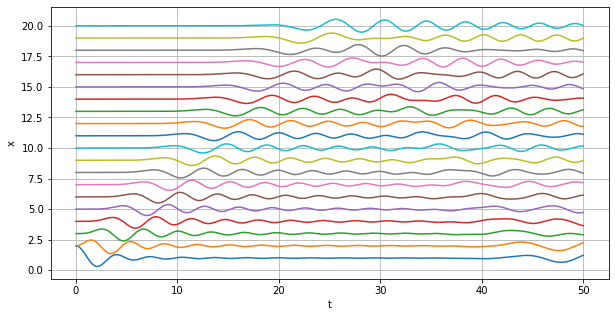

In [22]:
plt.figure(figsize=(10,5))
for n in range(1,N+1):
    plt.plot(time, x[n][:-1])
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

### Energy Diagram

In [23]:
E = []
for n in range(1,N+1):
    T = 1/2*m*v[n]**2
    V = springE( (np.array(x[n+1])-x0l[n+1]), (np.array(x[n])-x0l[n]) ) + springE( (np.array(x[n])-x0l[n]), (np.array(x[n-1]-x0l[n-1])) )
    E.append(T+V)
Etot=sum(E)

C:\Users\akibi\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\akibi\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


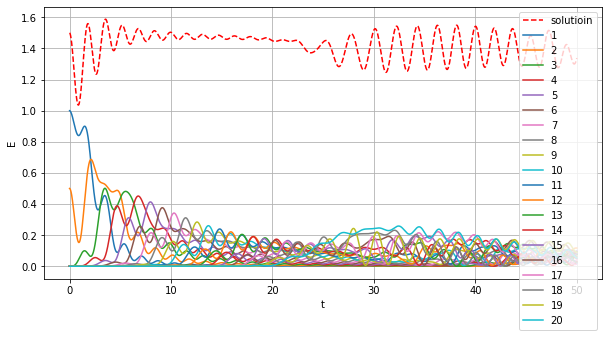

In [24]:
plt.figure(figsize=(10,5))
plt.plot(time, Etot[:-1], 'r--', label='solutioin')
for n in range(N):
    plt.plot(time, E[n][:-1], label=str(n+1))
plt.xlabel('t')
plt.ylabel('E')
plt.grid()
plt.legend()